# Load data

In [1]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization

ensembles = [
    Ensemble(code='3a1g_B', database='atlas'),
    Ensemble(code='PED00157e001', database='ped'),
    Ensemble(code='PED00001e001', database='ped')
]
data_dir = '/home/giacomo/projects/ensemble_analysis/out'
analysis = EnsembleAnalysis(ensembles=ensembles, output_dir=data_dir)
analysis.load_trajectories()


File already exists. Skipping download.
Extracted file /home/giacomo/projects/ensemble_analysis/out/3a1g_B.zip.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Ensemble PED00001e001 already downloaded. Skipping.
File PED00001e001.pdb already exists. Skipping extraction.
Loading trajectory for 3a1g_B_prod_R1_fit...
Loading trajectory for 3a1g_B_prod_R2_fit...
Loading trajectory for 3a1g_B_prod_R3_fit...
PED00157e001 chain ids: ['A']
Generating trajectory for PED00157e001...
Generated trajectory saved to /home/giacomo/projects/ensemble_analysis/out.
PED00001e001 chain ids: ['A']
Generating trajectory for PED00001e001...
Generated trajectory saved to /home/giacomo/projects/ensemble_analysis/out.


{'3a1g_B_prod_R1_fit': <mdtraj.Trajectory with 10001 frames, 658 atoms, 40 residues, and unitcells at 0x7f40442d1a50>,
 '3a1g_B_prod_R2_fit': <mdtraj.Trajectory with 10001 frames, 658 atoms, 40 residues, and unitcells at 0x7f4043ae7e50>,
 '3a1g_B_prod_R3_fit': <mdtraj.Trajectory with 10001 frames, 658 atoms, 40 residues, and unitcells at 0x7f4043bea4a0>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x7f4027d67eb0>,
 'PED00001e001': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x7f403b9a4040>}

# Flory scaling exponent (v)

In [2]:
print("# Flory scaling exponents")
v_values = analysis.get_features("flory_exponent")
for code in v_values:
    print(f"{code}: {v_values[code]:.4f}")

# Flory scaling exponents
3a1g_B_prod_R1_fit: 0.1995
3a1g_B_prod_R2_fit: 0.1019
3a1g_B_prod_R3_fit: 0.1589
PED00157e001: 0.5550
PED00001e001: 0.3244


# end-to-end on Rg

In [3]:
vis = Visualization(analysis=analysis)

# Raw end-to-end distances


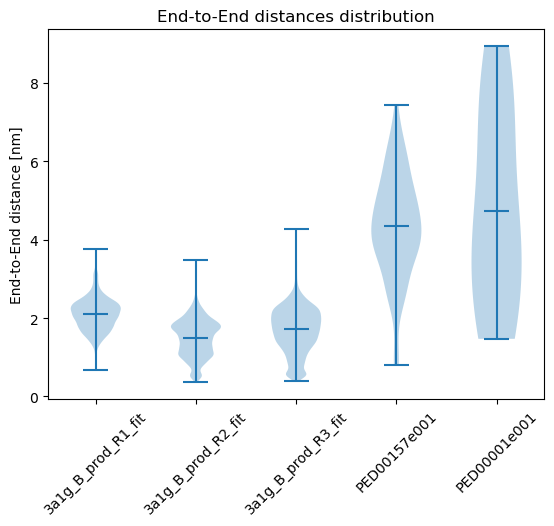

In [4]:
print("# Raw end-to-end distances")
_ = vis.end_to_end_distances(violin_plot=True, median=False, means=True)

# Raw end-to-end distances normalized on average Rg


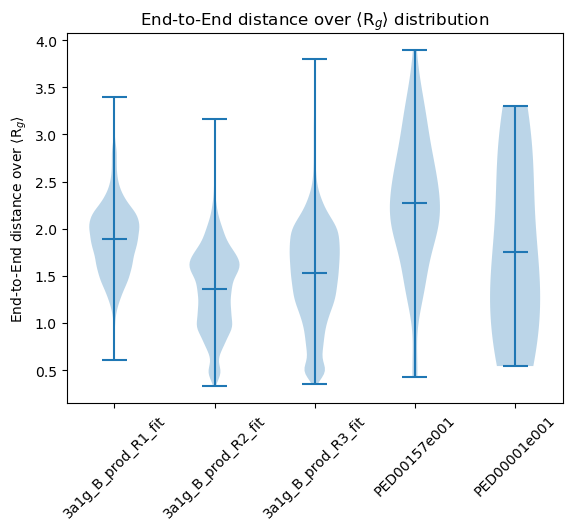

In [5]:
print("# Raw end-to-end distances normalized on average Rg")
_ = vis.end_to_end_distances(rg_norm=True, violin_plot=True, median=False, means=True)

# Summary

In [6]:
summary = analysis.get_features_summary_dataframe(
    selected_features=["rg", "end_to_end", "ee_on_rg", "flory_exponent"],
    show_variability=False
)
display(summary)

,ensemble_code,n_residues,n_conformers,rg_mean,end_to_end_mean,ee_on_rg_mean,flory_exponent
0,3a1g_B_prod_R1_fit,40,10001,1.108973,2.102769,1.896140,0.199508
1,3a1g_B_prod_R2_fit,40,10001,1.102151,1.503101,1.363789,0.101918
2,3a1g_B_prod_R3_fit,40,10001,1.121786,1.714967,1.528782,0.158851
3,PED00157e001,59,100,1.908008,4.339479,2.274351,0.555003
4,PED00001e001,92,11,2.704693,4.742165,1.753310,0.324401
